In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('/content/DataSet.csv')
print(data.head())

    SEQN  ALQ101  ALQ110  ALQ130  SMQ020  RIAGENDR  RIDAGEYR  RIDRETH1  \
0  83732     1.0     NaN     1.0       1         1        62         3   
1  83733     1.0     NaN     6.0       1         1        53         3   
2  83734     1.0     NaN     NaN       1         1        78         3   
3  83735     2.0     1.0     1.0       2         2        56         3   
4  83736     2.0     1.0     1.0       2         2        42         4   

   DMDCITZN  DMDEDUC2  ...  BPXSY2  BPXDI2  BMXWT  BMXHT  BMXBMI  BMXLEG  \
0       1.0       5.0  ...   124.0    64.0   94.8  184.5    27.8    43.3   
1       2.0       3.0  ...   140.0    88.0   90.4  171.4    30.8    38.0   
2       1.0       3.0  ...   132.0    44.0   83.4  170.1    28.8    35.6   
3       1.0       5.0  ...   134.0    68.0  109.8  160.9    42.4    38.5   
4       1.0       4.0  ...   114.0    54.0   55.2  164.9    20.3    37.4   

   BMXARML  BMXARMC  BMXWAIST  HIQ210  
0     43.6     35.9     101.1     2.0  
1     40.0     33.

In [11]:
print(data.shape)

(5735, 28)


In [12]:
print(data.columns)

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')


In [13]:
new_data = data[['SEQN','SMQ020', 'RIAGENDR', 'RIDAGEYR','DMDEDUC2','BMXWT', 'BMXHT', 'BMXBMI']]

In [14]:
print(new_data.head())

    SEQN  SMQ020  RIAGENDR  RIDAGEYR  DMDEDUC2  BMXWT  BMXHT  BMXBMI
0  83732       1         1        62       5.0   94.8  184.5    27.8
1  83733       1         1        53       3.0   90.4  171.4    30.8
2  83734       1         1        78       3.0   83.4  170.1    28.8
3  83735       2         2        56       5.0  109.8  160.9    42.4
4  83736       2         2        42       4.0   55.2  164.9    20.3


In [15]:
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   SMQ020    5735 non-null   int64  
 2   RIAGENDR  5735 non-null   int64  
 3   RIDAGEYR  5735 non-null   int64  
 4   DMDEDUC2  5474 non-null   float64
 5   BMXWT     5666 non-null   float64
 6   BMXHT     5673 non-null   float64
 7   BMXBMI    5662 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 358.6 KB
None


In [16]:
new_data = new_data.rename(columns={
    'SEQN': 'seqn',
    'SMQ020': 'smoking',
    'RIAGENDR': 'gender',
    'RIDAGEYR': 'age',
    'DMDEDUC2': 'education',
    'BMXWT': 'weight',
    'BMXHT': 'height',
    'BMXBMI': 'bmi'
})

In [17]:
print(new_data.head())

    seqn  smoking  gender  age  education  weight  height   bmi
0  83732        1       1   62        5.0    94.8   184.5  27.8
1  83733        1       1   53        3.0    90.4   171.4  30.8
2  83734        1       1   78        3.0    83.4   170.1  28.8
3  83735        2       2   56        5.0   109.8   160.9  42.4
4  83736        2       2   42        4.0    55.2   164.9  20.3


In [18]:
print(new_data.duplicated().sum())

0


In [19]:
new_data = new_data.drop('seqn', axis=1)

In [20]:
print(new_data.head())

   smoking  gender  age  education  weight  height   bmi
0        1       1   62        5.0    94.8   184.5  27.8
1        1       1   53        3.0    90.4   171.4  30.8
2        1       1   78        3.0    83.4   170.1  28.8
3        2       2   56        5.0   109.8   160.9  42.4
4        2       2   42        4.0    55.2   164.9  20.3


In [21]:
print(new_data.isnull().sum())

smoking        0
gender         0
age            0
education    261
weight        69
height        62
bmi           73
dtype: int64


In [ ]:
new_data['education'].fillna(new_data['education'].median())

In [ ]:
for i in ['weight', 'height', 'bmi']:
  new_data[i].fillna(new_data[i].mean(), inplace=True)

In [29]:
print(new_data.isnull().sum())

smoking      0
gender       0
age          0
education    0
weight       0
height       0
bmi          0
dtype: int64


In [30]:
columns_to_check = ['age', 'weight', 'height', 'bmi']

for col in columns_to_check:
    Q1 = new_data[col].quantile(0.25)
    Q3 = new_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    new_data = new_data[(new_data[col] >= lower) & (new_data[col] <= upper)]

In [41]:
new_data['smoking'] = new_data['smoking'].replace({1: 'yes', 2:'no', 7: np.nan, 9: np.nan})
new_data['gender'] = new_data['gender'].replace({1: 'male', 2:'feamle'})
new_data['education'] = new_data['education'].replace({1: '<9th grade',
                                                       2:'9-11th grade',
                                                       3: 'HS or GED',
                                                       4: 'Some college / AA',
                                                       5: 'College or above',
                                                       9: 'Other'})

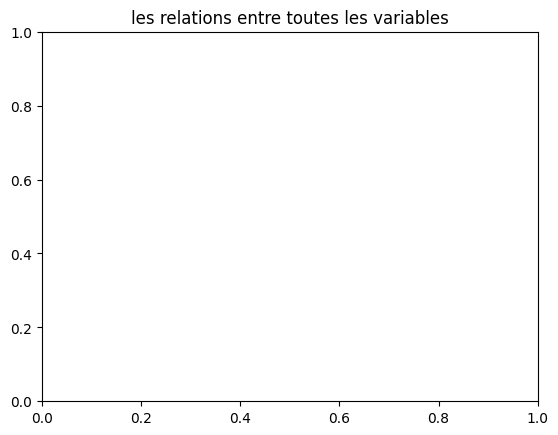

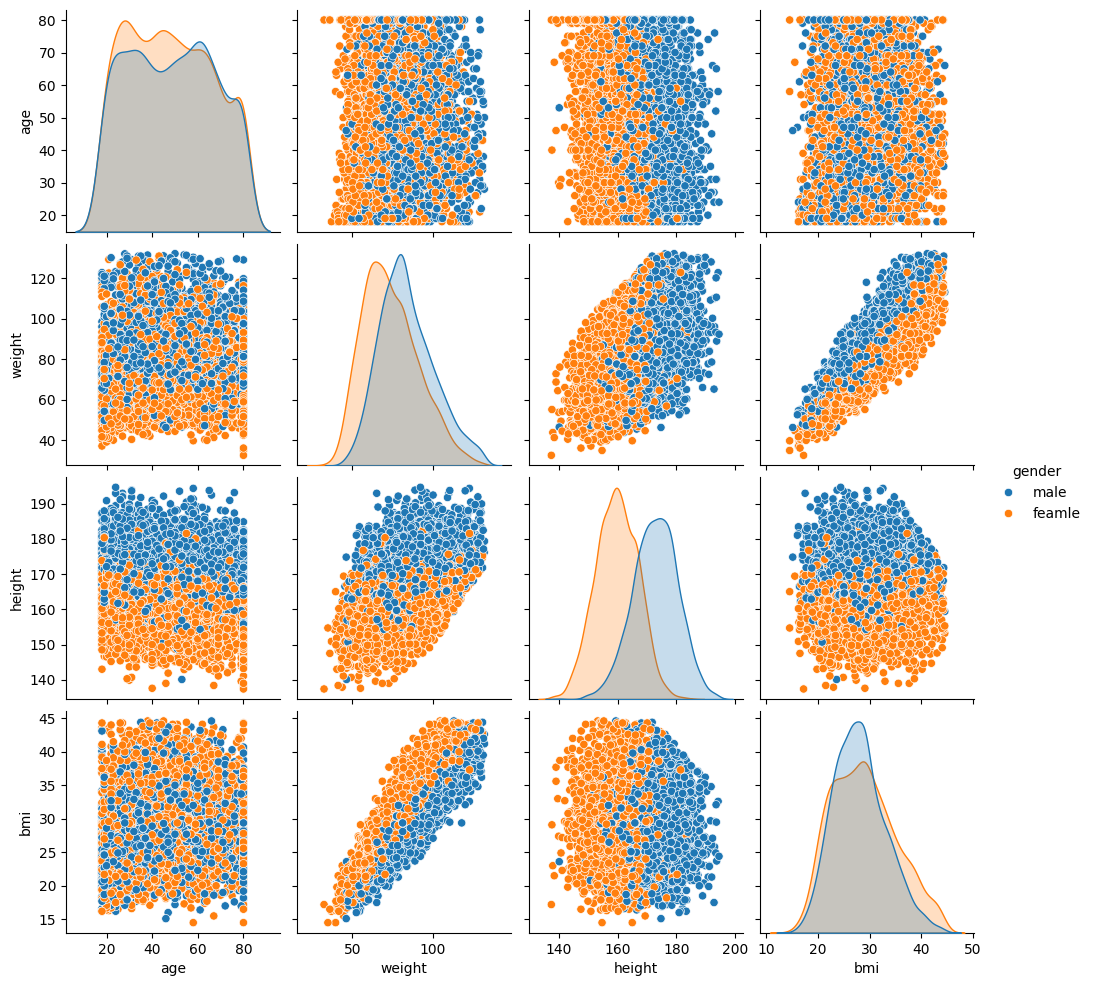

In [45]:
plt.title('les relations entre toutes les variables')
sns.pairplot(new_data, hue='gender')
plt.show()

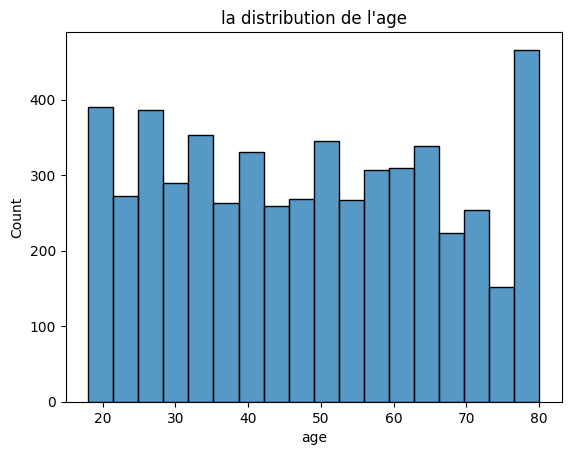

In [46]:
plt.title("la distribution de l'age")
sns.histplot(new_data['age'])
plt.show()

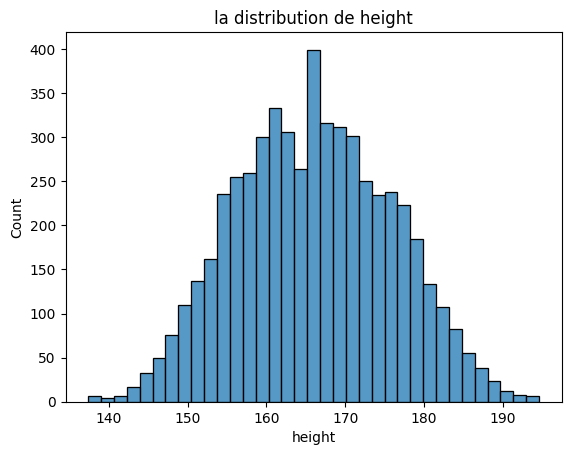

In [47]:
plt.title("la distribution de height")
sns.histplot(new_data['height'])
plt.show()

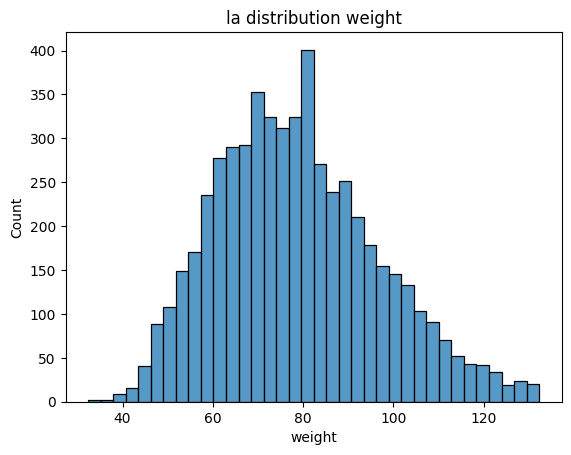

In [48]:
plt.title("la distribution weight")
sns.histplot(new_data['weight'])
plt.show()

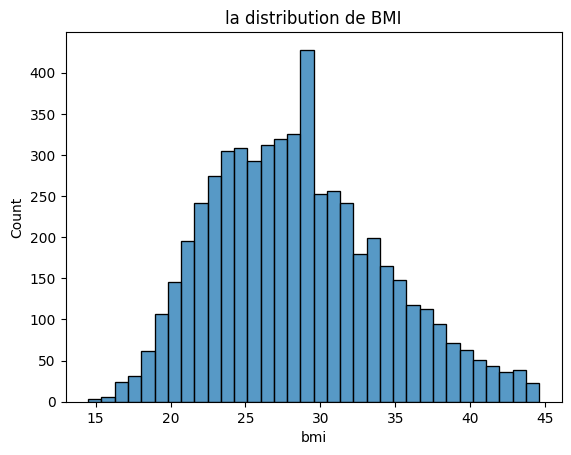

In [49]:
plt.title("la distribution de BMI")
sns.histplot(new_data['bmi'])
plt.show()

<Axes: xlabel='smoking', ylabel='count'>

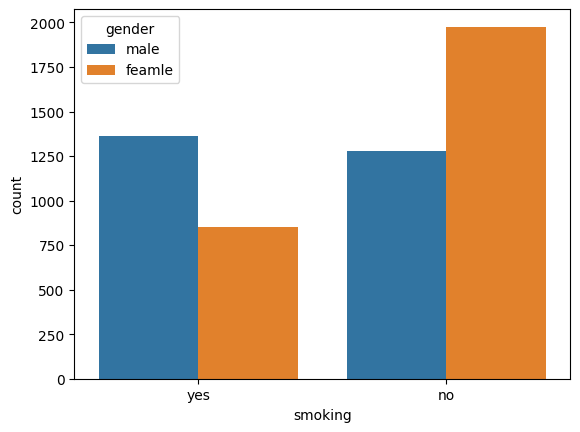

In [50]:
sns.countplot(x='smoking', hue='gender', data=new_data)

In [ ]:
new_data.to_csv('/Cleaned_data.csv')